# PyTorch 101
> A brief introduction to PyTorch

- badges: true
- comments: true
- author: Naman Manchanda
- categories: [jupyter, pytorch, python, programming]

Table of Contents: <a id=100></a>
1. [Packages](#1) 
2. [Matrices](#2)
    - 2.1 [Tensors from numpy arrays](#3)
    - 2.2 [Tensors from scratch](#4)
    - 2.3 [Numpy array from tensor](#5)
3. [Tensor operations](#6)
    - 3.1 [Reshaping](#7)
    - 3.2 [Indexing](#8)
4. [Tensor arithmetic](#9)
    - 4.1 [Addition](#10)
    - 4.2 [Subtraction](#11)
    - 4.3 [Multipliciation](#12)
    - 4.4 [Division](#13)
    - 4.5 [Mean](#14)
    - 4.6 [Standard Deviation](#15)
5. [Gradients](#16)
    - 5.1 [Example using a single value](#17)
    - 5.2 [Example using 1-D tensor](#18)
6. [Linear Regression](#19)
    - 6.1 [Building a simple dataset](#20)
    - 6.2 [Building the model](#21)
    - 6.3 [Training the model](#22)
    - 6.4 [Save the model](#23)

### 1. Packages <a id=1></a>
[back to top](#100)

In [1]:
# data manipulation & plot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# pytorch
import torch
import torch.nn as nn

# disable warnings
import warnings
warnings.filterwarnings("ignore")

### 2. Matrices <a id=2></a>
[back to top](#100)

#### 2.1 Tensors from Numpy arrays <a id=3></a>

##### 2.1.1 Numpy arrays

In [2]:
arr = np.array([1,2,3,4,5,])
print(arr)
print(arr.dtype)
type(arr)

[1 2 3 4 5]
int64


numpy.ndarray

##### 2.1.2 Numpy arrays to Tensors 

There are multiple ways to convert **numpy array** to a **tensor**. The different ways are:
- `torch.from_numpy()` - This converts a numpy array to a tensor.
- `torch.as_tensor()` - This is a general way to convert an object to tensor.
- `torch.tensor()` - This creates a copy of the object as a tensor.

In [3]:
# using torch.from_numpy()
x = torch.from_numpy(arr)
print(x)
print(x.dtype)
print(type(x))

tensor([1, 2, 3, 4, 5])
torch.int64
<class 'torch.Tensor'>


In [4]:
# using torch.as_tensor()
x = torch.as_tensor(arr)
print(x)
print(x.dtype)
print(type(x))

tensor([1, 2, 3, 4, 5])
torch.int64
<class 'torch.Tensor'>


For both of the above mentioned methods, there's a little caveat to understand. `torch.from_numpy()` and `torch.as_tensor()` creates a direct link between the numpy array and the tensor. Any change in the numpy array will affect the tensor. Following is an example.

In [5]:
arr = np.array([1,2,3,4,5,])
print("Numpy array    : ",arr)
x = torch.from_numpy(arr)
print("PyTorch tensor : ",x)

# chaning the 0th index of arr
arr[0] = 999
print("Numpy array    : ",arr)
print("PyTorch tensor : ",x)

Numpy array    :  [1 2 3 4 5]
PyTorch tensor :  tensor([1, 2, 3, 4, 5])
Numpy array    :  [999   2   3   4   5]
PyTorch tensor :  tensor([999,   2,   3,   4,   5])


It shows that though `torch.from_numpy()` converts the array to tensor, but it creates a reference to the same object. To create a copy of the array, `torch.tensor()` can be used.

In [6]:
# using torch.tensor()
arr = np.array([1,2,3,4,5,])
print("Numpy array    : ",arr)
x = torch.tensor(arr)
print("PyTorch tensor : ",x)

# chaning the 0th index of arr
arr[0] = 999
print("Numpy array    : ",arr)
print("PyTorch tensor : ",x)

Numpy array    :  [1 2 3 4 5]
PyTorch tensor :  tensor([1, 2, 3, 4, 5])
Numpy array    :  [999   2   3   4   5]
PyTorch tensor :  tensor([1, 2, 3, 4, 5])


#### 2.2 Tensors from scratch <a id=4></a>

Similar to `numpy` functions such as `ones`, `eye` & `arange` etc, `torch` provides some handy functions to work with.

##### 2.2.1 Allocate space in memory for tensor

In [7]:
torch.empty(4,2)

tensor([[0.0000e+00, 0.0000e+00],
        [1.8788e+31, 1.7220e+22],
        [6.0434e-07, 5.3175e-08],
        [1.0244e-11, 1.0548e-08]])

##### 2.2.2 Tensor of Zeros

In [8]:
torch.zeros(4,3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

##### 2.2.3 Tensor of Ones

In [9]:
torch.ones(3,4)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

##### 2.2.4 Evenly spaced values within a given interval

In [10]:
torch.arange(0,50,10)

tensor([ 0, 10, 20, 30, 40])

##### 2.2.5 Evenly spaced numbers over a specified interval

In [11]:
torch.linspace(0,50,10)

tensor([ 0.0000,  5.5556, 11.1111, 16.6667, 22.2222, 27.7778, 33.3333, 38.8889,
        44.4444, 50.0000])

##### 2.2.6 Python list to tensor

In [12]:
my_tensor = torch.tensor([1,2,3])
print(my_tensor)
print(my_tensor.dtype)
type(my_tensor)

tensor([1, 2, 3])
torch.int64


torch.Tensor

##### 2.2.7 Random number from uniform distribution

In [13]:
torch.rand(4,3)

tensor([[0.9425, 0.1938, 0.9745],
        [0.0672, 0.4665, 0.3066],
        [0.2388, 0.9712, 0.2791],
        [0.5487, 0.0524, 0.1219]])

##### 2.2.8 Random number from standard normal uniform distribution - mean 0 and standard deviation 1

In [14]:
torch.randn(4,3)

tensor([[ 0.1930, -0.4929,  0.2210],
        [-1.0913,  0.1019,  0.6927],
        [-2.2604,  0.1454, -0.0999],
        [ 0.1105, -0.6836, -1.1310]])

##### 2.2.9 Random integers

In [15]:
torch.randint(low=0,high=10,size=(5,5))

tensor([[3, 2, 4, 2, 1],
        [8, 4, 8, 3, 5],
        [5, 4, 0, 1, 4],
        [1, 6, 0, 5, 5],
        [5, 1, 6, 0, 6]])

##### 2.2.10 Random tensor with same shape as incoming tensor

In [16]:
x = torch.zeros(2,5)
print("Shape of incoming tensor")
print(x.shape)
print("-"*50)
print("Random tensor with uniform distribution")
print(torch.rand_like(x))
print("-"*50)
print("Random tensor with standard normal uniform distribution")
print(torch.randn_like(x))
print("-"*50)
print("Random tensor with integers")
print(torch.randint_like(x,low=0,high=10))

Shape of incoming tensor
torch.Size([2, 5])
--------------------------------------------------
Random tensor with uniform distribution
tensor([[0.1401, 0.7472, 0.5479, 0.6027, 0.1381],
        [0.3237, 0.5044, 0.4604, 0.4910, 0.9068]])
--------------------------------------------------
Random tensor with standard normal uniform distribution
tensor([[ 0.1214,  1.3723,  0.8735,  2.9361,  0.0329],
        [-1.6780, -1.2402, -0.1299,  1.0579,  0.1606]])
--------------------------------------------------
Random tensor with integers
tensor([[2., 8., 1., 6., 9.],
        [2., 3., 5., 9., 7.]])


#### 2.3 Numpy array from tensor <a id=5></a>

In [17]:
print("The tensor")
print(x)

arr = x.numpy()
print("-"*50)
print("The numpy array")
print(arr)
print(arr.dtype)
print(type(arr))

The tensor
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
--------------------------------------------------
The numpy array
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
float32
<class 'numpy.ndarray'>


### 3. Tensor operations <a id=6></a>
[back to top](#100)

#### 3.1 Reshaping <a id=7></a>

##### 3.1.1 Using `reshape()`

In [18]:
x = torch.arange(10)
print("Reshaped tensor")
print(x.reshape(2,5))
print("-"*50)
print("Original tensor")
print(x)

Reshaped tensor
tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
--------------------------------------------------
Original tensor
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


##### 3.1.2 Using `view()`

In [19]:
x = torch.arange(10)
print("Reshaped tensor")
print(x.view(2,5))
print("-"*50)
print("Original tensor")
print(x)

Reshaped tensor
tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
--------------------------------------------------
Original tensor
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


##### 3.1.3 Shape inference

In [20]:
x = torch.arange(10)
print(x.shape)
print("-"*50)
z = x.view(2,-1)
print(z)
print(z.shape)

torch.Size([10])
--------------------------------------------------
tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
torch.Size([2, 5])


As in the above case, if we put `-1` as the second dimension, it will itelf infer the same provided it makes sense. Try changing the above code to get a shape of `(3,-1)` which will provide an error; since a tensor of size 10 can't be reshaped to a tensor with first dimension as 3.

#### 3.2 Indexing <a id=8></a>

##### 3.2.1 Indexing

In [21]:
x = torch.arange(6).reshape(3,2)
print(x)
print(x[1,1])
type(x[1,1])

tensor([[0, 1],
        [2, 3],
        [4, 5]])
tensor(3)


torch.Tensor

##### 3.2.2 Selecting

In [22]:
x = torch.arange(6).reshape(3,2)
print(x)
print("_"*50)
print(x[:,1])
print(x[:,1].shape)
print("_"*50)
print(x[:,1:])
print(x[:,1:].shape)

tensor([[0, 1],
        [2, 3],
        [4, 5]])
__________________________________________________
tensor([1, 3, 5])
torch.Size([3])
__________________________________________________
tensor([[1],
        [3],
        [5]])
torch.Size([3, 1])


### 4. Tensor arithmetic <a id=9></a>
[back to top](#100)

There are multiple ways to do arithmetic. Direct operators as well as torch functions can be used.

#### 4.1 Addition <a id=10></a>

##### 4.1.1 Element-wise addition

In [23]:
a = torch.tensor([1.,2.,3.])
b = torch.tensor([4.,5.,6.])
print(a+b)
print(torch.add(a,b))

tensor([5., 7., 9.])
tensor([5., 7., 9.])


##### 4.1.2 In-place addition 

In [24]:
a = torch.tensor([1.,2.,3.])
b = torch.tensor([4.,5.,6.])
a.add_(b)
print(a)

tensor([5., 7., 9.])


The in-place arithmetic is applicable for all operations - `add_`, `sub_`, `mul_` etc.

#### 4.2 Subtraction <a id=11></a>

In [25]:
a = torch.tensor([1,2,3,4])
b = torch.tensor([1,1,1,1])
print(a-b)
print(torch.sub(a,b))

tensor([0, 1, 2, 3])
tensor([0, 1, 2, 3])


#### 4.3 Multiplication <a id=12></a>

In [26]:
a = torch.ones(2,2)
b = torch.zeros(2,2)
print(a*b)
print(torch.mul(a,b))

tensor([[0., 0.],
        [0., 0.]])
tensor([[0., 0.],
        [0., 0.]])


#### 4.4 Division <a id=13></a>

In [27]:
a = torch.ones(2,2)
b = torch.zeros(2,2)
print(a/b)
print(torch.div(a,b))

tensor([[inf, inf],
        [inf, inf]])
tensor([[inf, inf],
        [inf, inf]])


The tensor contains `inf` since any number divided by `0` is infinity.

#### 4.4 Mean <a id=14></a>

In [28]:
a = torch.arange(1,11,1,dtype=torch.float64)
print(a.mean(dim=0))

tensor(5.5000, dtype=torch.float64)


`a = torch.arange(1,11,1).mean(dim=0)` won't work since this would create a tensor of `int` and the `mean` can only be calculated for `float` in PyTorch.

#### 4.5 Standard Deviation <a id=15></a>

In [29]:
a = torch.Tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(a.std(dim=0))

tensor(3.0277)


### 5. Gradients <a id=16></a>
[back to top](#100)

A gradient, also called slope is simply defined as the rate of change of the functon at a particular point. PyTorch can easily calculate gradients and accumulate them. Just a single parameter `requires_grad` is used while defining tensors to track the gradient.

#### 5.1 Example using a single value <a id=17></a>

##### 5.1.1 Defining a 1-D tensor `x` with a single value

In [30]:
x = torch.tensor([2],dtype=torch.float64, requires_grad = True)
x

tensor([2.], dtype=torch.float64, requires_grad=True)

##### 5.1.2 Calculating a function `y` depending upon `x`

$$
y = 5(x+1)^2
$$

In [31]:
y = 5 * ((x + 1)**2)
y

tensor([45.], dtype=torch.float64, grad_fn=<MulBackward0>)

##### 5.1.3 Calculating the gradient of `y` wrt `x`

$$
dy/dx = 10(x+1)
$$

$$
dy/dx = 10(2+1) = 30 
$$

In [32]:
y.backward()
x.grad

tensor([30.], dtype=torch.float64)

#### 5.2 Example using 1-D tensor <a id=18></a>

##### 5.2.1 Defining a 1-D tensor `x` with more than 1 value

In [33]:
x = torch.ones(2,requires_grad = True)
x

tensor([1., 1.], requires_grad=True)

##### 5.2.2 Calculating a function `y` depending upon `x`

$$
y = 5(x+1)^2
$$

In [34]:
y = 5 * ((x + 1)**2)
y

tensor([20., 20.], grad_fn=<MulBackward0>)

We can observe that `y` is also a tensor with more than one value. But `backward` can only be called on a scaler or a 1-element tensor. We can create another function let's say `o` depending upon `y`.

$$
o = 1/2 * \sum_{n=x_i}^{x_n} y_i
$$

In [35]:
o = 0.5 * torch.sum(y)
o

tensor(20., grad_fn=<MulBackward0>)

##### 5.2.3 Calculating the gradient of `o` wrt `x`

$$
o = 1/2 * \sum_{n=x_i}^{x_n} 5(x_i+1)^2
$$

$$
do/dx_i = 1/2 * 10(x_i+1)
$$

$$
do/dx_1 = 1/2 * 10(1+1) = 10
$$

In [36]:
o.backward()
x.grad

tensor([10., 10.])

### 6. Linear Regression <a id=19></a>
[back to top](#100)

Linear Regression allows to understand the relationship between 2 continuous variables. For example `x` is an independent variable and `y` is dependent upon x, then the linear equation would be as follows with `a` as the slope of the equation and `b` as the intercept.
$$
y = ax+b
$$
In this part of notebook, I'm creating a Linear Regression model in PyTorch.

#### 6.1 Building a simple dataset <a id=20></a>
[back to top](#100)

##### 6.1.1 Defining values

In [37]:
x = np.arange(0,11,1,dtype=np.float32) # creating an independent variable x
y = 2 * x + 1                          # creating a dependent variable y
print(x.shape)
print(y.shape)
print(x)
print(y)

(11,)
(11,)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19. 21.]


##### 6.1.2 Reshaping arrays for PyTorch model

In [38]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)
print(x.shape, y.shape)

(11, 1) (11, 1)


##### 6.1.3 Plotting the linear curve

This is the plot of the equation that states `y=2x+1`.

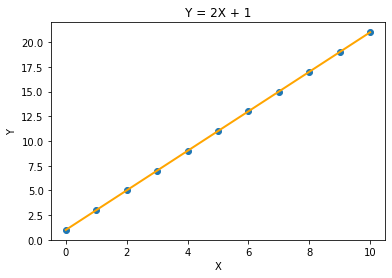

In [39]:
plt.scatter(x,y)
plt.plot(x,y,color="Orange",linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Y = 2X + 1")
plt.show()

#### 6.2 Building the model <a id=21></a>
[back to top](#100)

##### 6.2.1 Model Class

In [40]:
class LinearRegressionModel(nn.Module):
    
    def __init__(self,input_dim, output_dim):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self,x):
        out = self.linear(x)
        return out

##### 6.2.2 Instantiate the model

In [41]:
input_dim=1
output_dim=1
model = LinearRegressionModel(input_dim,output_dim)

##### 6.2.3 Instantiate optimizer and loss

Many loss functions can be used according to the problem statement. Linear regression mostly uses MSE or RMSE. I'll be using MSE for this case i.e Mean square error and its formula is as follows.
$$
MSE = 1/n \sum_{n=1}^{n} (y_p - y_i)^2
$$

In [42]:
criterion=nn.MSELoss() # loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

#### 6.3 Training the model <a id=22></a>
[back to top](#100)

##### 6.3.1 The training loop

In [43]:
epochs = 100
for epoch in range(epochs):
    
    # convert numpy arrays to tensors
    inputs=torch.tensor(x,dtype=torch.float32, requires_grad=True)
    labels=torch.tensor(y,dtype=torch.float32)
    
    # clear the gradients
    optimizer.zero_grad()
    
    # forward to get output
    outputs=model(inputs)
    
    # calculating loss
    loss=criterion(outputs,labels)
    
    # backpropagation
    loss.backward()
    
    # updating parameters
    optimizer.step()
    
print("Training complete...")

Training complete...


##### 6.3.2 Predictions

The true values are

In [44]:
y

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

The predicted values are

In [45]:
predicted = model(torch.tensor(x,requires_grad=True)).data.numpy()
predicted

array([[ 0.13100429],
       [ 2.2561476 ],
       [ 4.381291  ],
       [ 6.5064344 ],
       [ 8.6315775 ],
       [10.756721  ],
       [12.881865  ],
       [15.007008  ],
       [17.13215   ],
       [19.257294  ],
       [21.382437  ]], dtype=float32)

##### 6.3.3 Plot predictions and true value

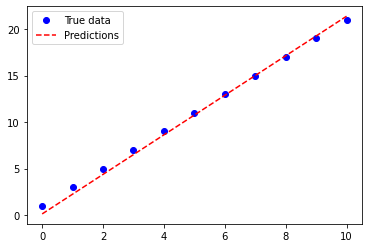

In [46]:
# Plot true data
plt.plot(x, y, 'go', color="Blue",label='True data',)

# Plot predictions
plt.plot(x, predicted, '--',color="Red", label='Predictions')

# Legend and plot
plt.legend(loc='best')
plt.show()

#### 6.3 Save the model <a id=23></a>
[back to top](#100)

After this step, you may check out `./linear_regression_model.pkl` file path, where the model would be saved.

In [47]:
torch.save(model.state_dict(),'linear_regression_model.pkl')

### I'll be updating it regularly. If it helped you, consider giving an upvote. ✌🏼
[back to top](#100)

Check my other notebooks
1. https://www.kaggle.com/namanmanchanda/asl-detection-99-accuracy
2. https://www.kaggle.com/namanmanchanda/rnn-in-pytorch
3. https://www.kaggle.com/namanmanchanda/heart-attack-eda-prediction-90-accuracy
4. https://www.kaggle.com/namanmanchanda/stroke-eda-and-ann-prediction

The code in this notebook has been referenced from various sources available online, some of which are
1. https://www.deeplearningwizard.com
2. https://www.udemy.com/course/pytorch-for-deep-learning-with-python-bootcamp/